<a href="https://colab.research.google.com/github/shizacharania/Brain-Tumour-Grading/blob/main/TumourGrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving brain_tumour_grading_data_small.zip to brain_tumour_grading_data_small.zip


In [13]:
!unzip /content/brain_tumour_grading_data_small.zip

Archive:  /content/brain_tumour_grading_data_small.zip
replace brain_tumour_grading_data_small/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [14]:
# getting the file paths for gr2 images, gr3 images, and gr4 images - examples:
# grade 2: /content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1.nii
# grade 3: /content/brain_tumour_grading_data_small/grade3/2.000000-AXIAL_T2-79698_AXIAL_T2_2_e1.nii
# grade 4: /content/brain_tumour_grading_data_small/grade4/1.000000-AXIAL_T1_POST_GD-81414_AXIAL_T1_POST_GD_1.nii

In [15]:
import os

grade2_rootpath = "/content/brain_tumour_grading_data_small/grade2"
grade3_rootpath = "/content/brain_tumour_grading_data_small/grade3"
grade4_rootpath = "/content/brain_tumour_grading_data_small/grade4"

grade2_filepaths = os.listdir(grade2_rootpath)
grade3_filepaths = os.listdir(grade3_rootpath)
grade4_filepaths = os.listdir(grade4_rootpath)

grade2_filepaths.remove('.DS_Store')
grade3_filepaths.remove('.DS_Store')
grade4_filepaths.remove('.DS_Store')

print("There are " + str(len(grade2_filepaths)) + " grade 2 files")
print(grade2_filepaths)
print("There are " + str(len(grade3_filepaths)) + " grade 3 files")
print(grade3_filepaths)
print("There are " + str(len(grade4_filepaths)) + " grade 4 files")
print(grade4_filepaths)

There are 10 grade 2 files
['2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2.nii', '5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5.nii', '5.000000-AXIAL_T1_PRE_GD-09302_AXIAL_T1_PRE_GD_5.nii', '2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e1.nii', '1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1.nii', '4.000000-AXIAL_T1-45172_AXIAL_T1_4.nii', '5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5.nii', '1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1.nii', '5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5.nii', '5.000000-AXIAL_T1_PRE_GD-04080_AXIAL_T1_PRE_GD_5.nii']
There are 10 grade 3 files
['5.000000-axial_t1_pre_gd-70698_axial_t1_pre_gd_5.nii', '5.000000-AXIAL_T1_PRE_GD-61134_AXIAL_T1_PRE_GD_5.nii', '2.000000-AXIAL_T2-79698_AXIAL_T2_2_e1.nii', '5.000000-AXIAL_T1_PRE-GAD.-55766_AXIAL_T1_PRE-GAD._5.nii', '3.000000-AXIAL_T1_POST_GAD-25828_AXIAL_T1_POST_GAD_3.nii', '6.000000-AXIAL_T1_PRE_GD-25584_AXIAL_T1_PRE_GD_6.nii', '5.000000-A

In [16]:
filepaths = []
labels = []

for afilepath in grade2_filepaths:
  filepaths.append(grade2_rootpath + "/" + afilepath)
  labels.append("grade 2")

for afilepath in grade3_filepaths:
  filepaths.append(grade3_rootpath + "/" + afilepath)
  labels.append("grade 3")

for afilepath in grade4_filepaths:
  filepaths.append(grade4_rootpath + "/" + afilepath)
  labels.append("grade 4")

In [17]:
print(filepaths)
print(labels)

print("There are " + str(len(filepaths)) + " files and " + str(len(labels)) + " labels in total.")
print(len(filepaths) == len(labels))

['/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-06516_AXIAL_T1_PRE_GD_5.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-09302_AXIAL_T1_PRE_GD_5.nii', '/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e1.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-70447_AXIAL_T1_POST_GD_1.nii', '/content/brain_tumour_grading_data_small/grade2/4.000000-AXIAL_T1-45172_AXIAL_T1_4.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_POST_GAD.-46431_AXIAL_T1_POST_GAD._5.nii', '/content/brain_tumour_grading_data_small/grade2/1.000000-AXIAL_T1_POST_GD-55708_AXIAL_T1_POST_GD_1.nii', '/content/brain_tumour_grading_data_small/grade2/5.000000-AXIAL_T1_PRE_GD-00202_AXIAL_T1_PRE_GD_5.nii', '/content/brain_tumour_

In [59]:
print(filepaths[0])
print(filepaths[28])

/content/brain_tumour_grading_data_small/grade2/2.000000-AXIAL_VARIABLE_ECHO_PDT2-74529_AXIAL_VARIABLE_ECHO_PD_T2_2_e2.nii
/content/brain_tumour_grading_data_small/grade4/5.000000-AXIAL_T1_BRAIN_PRE_GD-60183_AXIAL_T1_BRAIN_PRE_GD_5.nii


In [18]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [19]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import SimpleITK as sitk

In [43]:
img_nparrays = []

for filepath in filepaths:
  img = sitk.ReadImage(filepath) # returns a <class 'SimpleITK.SimpleITK.Image'>
  img = sitk.GetArrayFromImage(img)
  img_nparrays.append(img)
print(len(img_nparrays))

30


(21, 256, 256)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(256, 256)


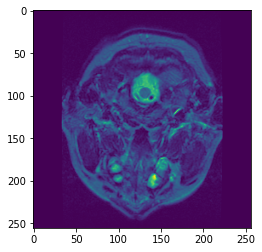

In [63]:
# 1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
import matplotlib.pyplot as plt
import numpy as np

testing_img = img_nparrays[0]
print(testing_img.shape)
print(type(testing_img))

print(testing_img[:, :, :])

brain_slice = testing_img[1, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
plt.imshow(brain_slice)
print(testing_img[2, :, :].shape)

plt.show()

In [53]:
count = 0
min_slices = img_nparrays[0].shape[0]  # ig you would have to find the fewest amount of slices and then segment it that way

for i in range(len(img_nparrays)):
  img = img_nparrays[i]
  if (img.shape[0] == 3):
    print("HI")
    continue
  print((img_nparrays[i].shape))
  if (img_nparrays[i].shape[0] < min_slices and img.shape[0] != 3):
    min_slices = img_nparrays[i].shape[0];
  count += 1

print(count)
print(min_slices)

(21, 256, 256)
(60, 256, 256)
(57, 256, 256)
(21, 256, 256)
(58, 256, 256)
(56, 256, 256)
(30, 256, 256)
(56, 256, 256)
(58, 256, 256)
HI
(55, 256, 256)
(57, 256, 256)
(21, 256, 256)
(58, 256, 256)
(30, 256, 256)
(49, 256, 256)
(54, 256, 256)
(49, 256, 256)
(64, 256, 256)
(21, 256, 256)
(30, 256, 256)
(20, 256, 256)
(58, 256, 256)
(20, 256, 256)
(30, 256, 256)
(23, 256, 256)
(55, 256, 256)
(20, 256, 256)
(32, 256, 256)
(20, 256, 256)
29
20


In [61]:
same_size_arrays = []

for i in range(len(img_nparrays)):
  img = img_nparrays[i]
  # print(img.shape)

  if (img.shape[0] == 3):
    continue

  take_out = (img.shape[0]-min_slices)/2;
  # print(img.shape[0])
  # print(take_out)
  if (take_out % 1 == 0):
    # print("yes")
    start = int(take_out)
    end = int(img.shape[0]-take_out)
    print(start, end)
  if (take_out % 1 != 0):
    # print("no")
    start = int(take_out)
    end = int(img.shape[0]-take_out)
    print(start, end)

  brain_slice = img[start:end, :, :]
  print(brain_slice.shape)
  same_size_arrays.append(brain_slice)
#   print("\nNEXT\n")
  # print(img_nparrays[i].shape[0], start, end)

# print(testing_img[10, 180, 175:181])
  # print(brain_slice.shape)



0 20
(20, 256, 256)
20 40
(20, 256, 256)
18 38
(20, 256, 256)
0 20
(20, 256, 256)
19 39
(20, 256, 256)
18 38
(20, 256, 256)
5 25
(20, 256, 256)
18 38
(20, 256, 256)
19 39
(20, 256, 256)
17 37
(20, 256, 256)
18 38
(20, 256, 256)
0 20
(20, 256, 256)
19 39
(20, 256, 256)
5 25
(20, 256, 256)
14 34
(20, 256, 256)
17 37
(20, 256, 256)
14 34
(20, 256, 256)
22 42
(20, 256, 256)
0 20
(20, 256, 256)
5 25
(20, 256, 256)
0 20
(20, 256, 256)
19 39
(20, 256, 256)
0 20
(20, 256, 256)
5 25
(20, 256, 256)
1 21
(20, 256, 256)
17 37
(20, 256, 256)
0 20
(20, 256, 256)
6 26
(20, 256, 256)
0 20
(20, 256, 256)


In [62]:
print(len(same_size_arrays))

29


In [58]:
# for one:
# img = img_nparrays[1]
# print(img.shape)

# take_out = (img.shape[0]-min_slices)/2;
# print(img.shape[0])
# print(take_out)
# if (take_out % 1 == 0):
#   # print("yes")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)
# if (take_out % 1 != 0):
#   # print("no")
#   start = int(take_out)
#   end = int(img.shape[0]-take_out)
#   print(start, end)

# brain_slice = img[start:end, :, :]
# print(brain_slice.shape)
# #   print("\nNEXT\n")
#   # print(img_nparrays[i].shape[0], start, end)

# # print(testing_img[10, 180, 175:181])
#   # print(brain_slice.shape)


In [ ]:
"""
size is not the same :(

find mean and standard deviation on the entire volume of one image - do we need size to be same for this?
^yes, but why?
 I should be taking the mean and standard deviation for each volume as a whole and then
 averaging that instead of taking it for each slice of each volume. Also, for normalization,
 the image size should be the same for all the scans with different volumes (which will also tie
into other preprocessing steps). Normalization is one part of preprocessing though

convert the array into a torch tensor
convert all pixel values into float32
make pixel value range from 0 to 1

if needed, volume reshaping (ndimage.zoom (resize first and then normalize))
create a new dataset with the preprocessed images

even if preprocessing works out well, you can't train a model based on images with different dimensions


ALTERNATIVELY TO MAKE THE IMAGE VOLUMES THE SAME, YOU WOULD DO the the rigid registration (resizing) with the SimpleITK library
"""